In [1]:
import xarray as xr           #----xarray is used to open and read and manage .nc files
import numpy as np            #--------we can perform various calculations using 'numpy' 
import cartopy.crs as ccrs    
import cartopy.feature as cf
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from netCDF4 import Dataset
from scipy import stats
import matplotlib.patches as mpatches
import pandas as pd
from matplotlib import pyplot as plt
#import statsmodels.api as sm
from scipy import signal
import regionmask
import geopandas as gpd

In [2]:
ds = xr.open_dataset('UKMO_AprIC.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 36, number: 28, time: 96)
Coordinates:
  * longitude  (longitude) float32 60.0 61.0 62.0 63.0 ... 97.0 98.0 99.0 100.0
  * latitude   (latitude) float32 40.0 39.0 38.0 37.0 36.0 ... 8.0 7.0 6.0 5.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27
  * time       (time) datetime64[ns] 1993-06-01 1993-07-01 ... 2016-09-01
Data variables:
    tprate     (time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-19 05:55:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [17]:
lon = ds['longitude'][:]  
lat = ds['latitude'][:] 
fname='Homogeneous Region Shape File1 (1)/Homogeneous Region Shape File1.shp'
prcp=ds['tprate'].mean(axis=1)# For averaging the ensemble members
print(prcp.shape)

(96, 36, 41)


In [18]:
r_jun=prcp.sel(time=np.in1d(prcp['time.month'], [6]))
r_JUN=r_jun.to_numpy()
print(r_JUN.shape)
r_JUN=r_JUN*2592000000 # unit Conversion from m/s to mm i.e. 60 x 60 x 24 x 30 x 1000

r_jul=prcp.sel(time=np.in1d(prcp['time.month'], [7]))
r_JUL=r_jul.to_numpy()
print(r_JUL.shape)
r_JUL=r_JUL*2678400000 #60 x 60 x 24 x 31x 1000

r_aug=prcp.sel(time=np.in1d(prcp['time.month'], [8]))
r_AUG=r_aug.to_numpy()
print(r_AUG.shape)
r_AUG=r_AUG*2678400000 #60 x 60 x 24 x 31x 1000

r_sep=prcp.sel(time=np.in1d(prcp['time.month'], [9]))
r_SEP=r_sep.to_numpy()
print(r_SEP.shape)
r_SEP=r_SEP*2592000000 #60 x 60 x 24 x 30 x 1000

(24, 36, 41)
(24, 36, 41)
(24, 36, 41)
(24, 36, 41)


In [19]:
#JJAS season
JJAS=r_JUN+r_JUL+r_AUG+r_SEP
print(JJAS.shape)

(24, 36, 41)


In [20]:
# --- read netcdf file
ds2= xr.open_dataset('UKMO_SST_AprIC.nc')
ds2

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 81, number: 28, time: 96)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 40.0 39.0 38.0 37.0 ... -38.0 -39.0 -40.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27
  * time       (time) datetime64[ns] 1993-06-01 1993-07-01 ... 2016-09-01
Data variables:
    sst        (time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-22 12:25:40 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [21]:
s=ds2['sst'].mean(axis=1)# For averaging the ensemble members
print(s.shape)

(96, 81, 360)


In [22]:
# --- make niño 3.4 index
nino = s.sel(latitude=slice(5, -5), longitude=slice(-170, -120))
nino = nino.mean(dim=('latitude', 'longitude'))
nino

<xarray.DataArray 'sst' (time: 96)>
array([301.55664, 300.96188, 300.53036, 300.56143, 300.8117 , 300.3043 ,
       299.6938 , 299.62146, 300.73306, 300.0708 , 299.4805 , 299.44986,
       300.49335, 300.12515, 299.58652, 299.48434, 301.896  , 301.92508,
       302.0116 , 302.17206, 300.651  , 299.26657, 298.7632 , 298.8443 ,
       300.03012, 299.59256, 299.07178, 298.81366, 300.54828, 300.35324,
       300.07053, 300.0433 , 301.09637, 300.7824 , 300.63303, 300.7067 ,
       301.3172 , 300.84207, 300.49637, 300.50552, 300.1707 , 299.3862 ,
       298.81305, 298.8091 , 301.10873, 300.64255, 300.19373, 300.06235,
       301.08344, 300.66867, 300.32574, 300.26413, 300.94897, 300.60995,
       300.1929 , 300.24918, 300.33194, 299.74017, 299.05673, 299.15173,
       300.41028, 300.18817, 299.88928, 299.90897, 301.24243, 301.042  ,
       300.8724 , 300.95355, 300.63815, 299.7796 , 299.18015, 299.10748,
       300.85028, 300.59888, 300.26514, 300.24988, 301.20944, 301.1153 ,
       300.988  , 301.17746, 301.0054 , 300.69498, 300.39743, 300.39755,
       301.71838, 301.64844, 301.57794, 301.7498 , 302.00116, 301.79202,
       301.59976, 301.6495 , 300.60605, 299.70068, 299.27475, 299.37622],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1993-06-01 1993-07-01 ... 2016-09-01

In [23]:
sst_jun=nino.sel(time=np.in1d(nino['time.month'], [6]))
sst_JUN=sst_jun.to_numpy()

sst_jul=nino.sel(time=np.in1d(nino['time.month'], [7]))
sst_JUL=sst_jul.to_numpy()

sst_aug=nino.sel(time=np.in1d(nino['time.month'], [8]))
sst_AUG=sst_aug.to_numpy()

sst_sep=nino.sel(time=np.in1d(nino['time.month'], [9]))
sst_SEP=sst_sep.to_numpy()

In [24]:
sst_JJAS=(sst_JUN+sst_JUL+sst_AUG+sst_SEP)/4
sst_JJAS

array([300.9026 , 300.1078 , 299.93353, 299.92236, 302.00116, 299.3813 ,
       299.377  , 300.25385, 300.80463, 300.79028, 299.29477, 300.50183,
       300.58548, 300.50024, 299.57016, 300.09918, 301.0276 , 299.67633,
       300.49103, 301.12256, 300.62384, 301.67365, 301.76062, 299.73944],
      dtype=float32)

In [25]:
#Spatial correlation
cr=np.empty((2,36,41))
for i in range(0,36):
    for j in range(0,41):
        cr[:,i,j]=stats.spearmanr(JJAS[:,i,j],sst_JJAS)
print(cr.shape)

(2, 36, 41)


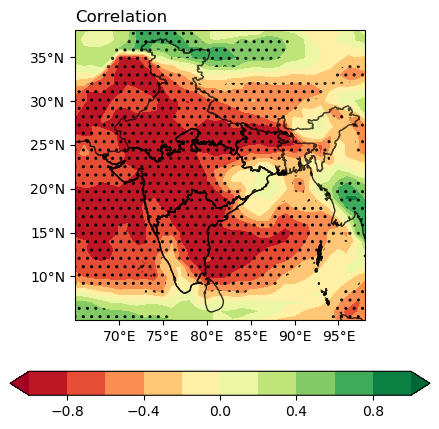

In [29]:
# Panel Plot 
fig, (ax1) = plt.subplots(1,1, figsize=(10, 5),subplot_kw={"projection": ccrs.PlateCarree()})

ax1.set_title('Correlation',fontsize=12, loc='left')
clevs = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
cf1 = ax1.contourf(lon,lat,cr[0],clevs,extend='both',transform=ccrs.PlateCarree(),
                   cmap=plt.cm.RdYlGn)
ax1.coastlines(alpha=0.8)
ax1.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.7)
ax1.set_xticks([70,75,80,85,90,95], crs=ccrs.PlateCarree())
ax1.set_yticks([10,15,20,25,30,35], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_extent([65, 98,5 ,37])
ax1.contourf(lon, lat, cr[1],levels=np.arange(0, 0.1, 0.01),
            transform=ccrs.PlateCarree(), hatches=['..'], alpha=0)


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3,top=0.88,left=0.2,right=0.9,wspace=-0.25,hspace=0.37)
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.34, 0.15, 0.42, 0.048])

# Draw the colorbar
cbar=fig.colorbar(cf1, cax=cbar_ax,orientation='horizontal')
#plt.text(280, -3, '(%)', fontsize = 11,rotation=90)#mm month$^-$$^1$)
#plt.text(-1690, -140, '(Clim:1991-2020)', fontsize = 11)
#plt.savefig("ISMR_Nino34_Corr_UKMO_1993_2016.jpg", dpi=600)
plt.show()